In [2]:
import numpy as np
import scipy.stats as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = [5, 3]

### EJ1

* tomar 30 muestras de una distribucion bernoulli con parametro p=0.3

(a) estimador plug-in del devio estandar de la distribucion

(b) estimar error estandar via bootstrap

(c) estimar el intervalo de confianza del 95% usando los métodos normal, percentile
bootstrap, basic bootstrap y BCa.


In [3]:
sample = np.random.binomial(1, 0.3, 30)
sample

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0])

In [4]:
def var_pluging(sample):
    return (1 / len(sample)) * np.sum((sample - np.mean(sample)) ** 2)


sd_plugin = np.sqrt(var_pluging(sample))
sd_plugin

0.4714045207910317

In [5]:
def basic_bootstrap(sample, Func, N):
    theta_bootstrap = np.zeros(N)

    for i in range(N):
        sample_bootstrap = np.random.choice(sample, len(sample), replace=True)
        theta_bootstrap[i] = Func(sample_bootstrap)
    return theta_bootstrap

Text(0.5, 0, 'bootstraped standard deviation')

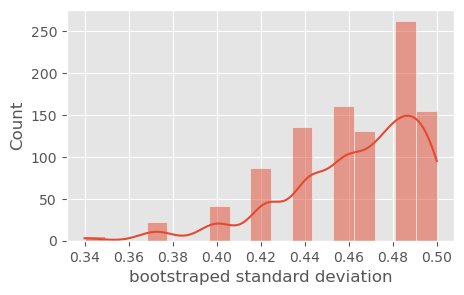

In [6]:
sd_bootstrap = basic_bootstrap(sample, var_pluging, 1000) ** 0.5

sns.histplot(sd_bootstrap, kde=True)
plt.xlabel("bootstraped standard deviation")

In [7]:
standard_error = np.std(sd_bootstrap)
print(
    "standard error: ", standard_error
)  # error estandar del desvio estandard de la muestra

standard error:  0.03094518522028266


In [8]:
# intervalo de confianza por metodo normal, como se puede observar arriba la distribucion en el bootstrap del SD_sample no es normal, va a ser una mala aproximacion.
alpha = 0.05


def normal_approximation_ci(bootstrapped_sample, alpha=0.05):
    z = st.norm.ppf(1 - (alpha / 2))
    lower = sd_plugin - z * standard_error
    upper = sd_plugin + z * standard_error
    return lower, upper


lower_normal, upper_normal = normal_approximation_ci(sd_bootstrap, alpha)
print("intervalo de confianza aproximacion normal: ", lower_normal, " ", upper_normal)

intervalo de confianza aproximacion normal:  0.4107530722643565   0.5320559693177068


In [9]:
def percentile_aproximation_ci(bootstrapped_sample, alpha=0.05):
    lower = np.quantile(bootstrapped_sample, alpha / 2)
    upper = np.quantile(bootstrapped_sample, 1 - (alpha / 2))
    return lower, upper


lower_per, upper_per = percentile_aproximation_ci(sd_bootstrap, alpha)
print("intervalo de confianza aproximacion percentil: ", lower_per, " ", upper_per)

intervalo de confianza aproximacion percentil:  0.37267799624996495   0.4988876515698589


In [10]:
(sample,)

(array([0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
        1, 0, 0, 1, 1, 0, 1, 0]),)

In [11]:
# basic bootstrap CI AKA bootstrap pivotal CI

basic_bootstrap_CI = st.bootstrap(
    (sample,), np.std, confidence_level=1 - alpha, method="basic"
)
print("intervalo de confianza pivotal ", basic_bootstrap_CI.confidence_interval)
lower_basic, upper_basic = basic_bootstrap_CI.confidence_interval

intervalo de confianza pivotal  ConfidenceInterval(low=0.44392139001220443, high=0.5701310453320985)


In [12]:
bca_bootstrap_CI = st.bootstrap(
    (sample,), np.std, confidence_level=1 - alpha, method="bca"
)  # bias corrected and accelerated
print("intervalo de confianza bca ", basic_bootstrap_CI.confidence_interval)
lower_bca, upper_bca = bca_bootstrap_CI.confidence_interval

intervalo de confianza bca  ConfidenceInterval(low=0.44392139001220443, high=0.5701310453320985)


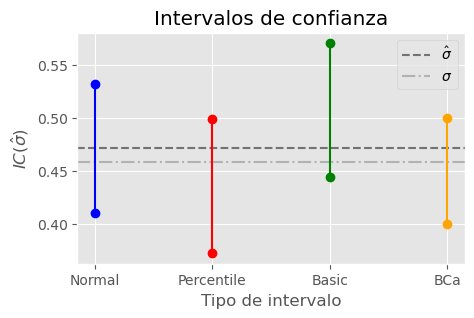

In [13]:
interval_names = ["Normal", "Percentile", "Basic", "BCa"]
plt.axhline(sd_plugin, color="k", ls="--", label="$\hat{\sigma}$", alpha=0.5)
plt.axhline((0.3 * 0.7) ** 0.5, color="grey", ls="-.", label="${\sigma}$", alpha=0.5)
plt.plot([1, 1], [lower_normal, upper_normal], "o-", color="blue")
plt.plot([2, 2], [lower_per, upper_per], "o-", color="red")
plt.plot([3, 3], [lower_basic, upper_basic], "o-", color="green")
plt.plot([4, 4], [lower_bca, upper_bca], "o-", color="orange")
plt.xticks([1, 2, 3, 4], labels=interval_names)
plt.xlabel("Tipo de intervalo")
plt.ylabel("$IC(\hat{\sigma})$")
plt.title("Intervalos de confianza")
plt.legend()
plt.show()

### EJ2

Considerar los datasets de los precios anuales de las acciones de The Coca-Cola Company y las
búsquedas en Google de “my cat scratched me” disponibles en https://shorturl.at/xIPSV.

(a) Encontrar el estimador plug-in del coeficiente de correlación entre ambos conjuntos de datos.

(b) Estimar su error estándar usando bootstrap.

(c) Encontrar un intervalo de confianza de nivel 0.95 usando los métodos normal, percentile
bootstrap, basic bootstrap y BCa


In [14]:
array_1 = np.array(
    [
        8,
        7.91667,
        19.8333,
        18.5833,
        29.0833,
        30.3333,
        35.4167,
        43.6667,
        37.25,
        45.75,
        47.1667,
        48.5,
        67.3333,
        79.3333,
        74.6667,
        85.6667,
    ]
)
array_2 = np.array(
    [
        30.73,
        22.7,
        28.58,
        32.94,
        35.08,
        36.99,
        41.12,
        42.26,
        42.34,
        41.5,
        45.91,
        46.94,
        55.32,
        54.27,
        58.82,
        63.56,
    ]
)
array_1_name = "Google searches for 'my cat scratched me'"
array_2_name = "The Coca-Cola Company's stock price (KO)"

In [15]:
# a)
def plugin_corr_coef(sample1, sample2):
    X_ = sample1 - sample1.mean()
    Y_ = sample2 - sample2.mean()
    return sum(X_ * Y_) / np.sqrt(np.sum(X_**2) * np.sum(Y_**2))


corr_coef = plugin_corr_coef(array_1, array_2)
print(f"coef de correlacion: {corr_coef:.4f}")

coef de correlacion: 0.9740


In [16]:
# b)
def two_paired_samples_bootstrap(sample_1, sample_2, Func, N):
    theta_bootstrap = np.zeros(N)
    number_of_samples = len(sample_1)

    for i in range(N):
        sample_index = np.random.choice(
            number_of_samples, number_of_samples, replace=True
        )
        theta_bootstrap[i] = Func(sample_1[sample_index], sample_2[sample_index])
    return theta_bootstrap


bootstrapped_corr_coef = two_samples_bootstrap(array_1, array_2, plugin_corr_coef, 5000)
corr_coef_SE = bootstrapped_corr_coef.std()
print(f"error standard del coef de correlacion: {corr_coef_SE:.4f}")

NameError: name 'two_samples_bootstrap' is not defined

In [ ]:
sns.histplot(bootstrapped_corr_coef, kde=True)

In [ ]:
# C)
# normal aprox CI
alpha = 0.05

z = st.norm.ppf(1 - (alpha / 2))
normal_lower = corr_coef - corr_coef_SE * z
normal_upper = corr_coef + corr_coef_SE * z

# percentile CI
percentile_lower, percentile_upper = st.bootstrap(
    (array_1, array_2),
    plugin_corr_coef,
    confidence_level=1 - alpha,
    method="percentile",
    paired=True,
).confidence_interval

# basic bootstrap CI (pivot)
basic_lower, basic_upper = st.bootstrap(
    (array_1, array_2),
    plugin_corr_coef,
    confidence_level=1 - alpha,
    method="basic",
    paired=True,
).confidence_interval

# Bca CI
bca_lower, bca_upper = st.bootstrap(
    (array_1, array_2), plugin_corr_coef, confidence_level=1 - alpha, paired=True
).confidence_interval

In [ ]:
interval_names = ["Normal", "Percentile", "Basic", "BCa"]
plt.axhline(corr_coef, color="k", ls="--", label="$\hat{\\rho}$", alpha=0.5)
plt.plot([1, 1], [normal_lower, normal_upper], "o-", color="blue")
plt.plot([2, 2], [percentile_lower, percentile_upper], "o-", color="red")
plt.plot([3, 3], [basic_lower, basic_upper], "o-", color="green")
plt.plot([4, 4], [bca_lower, bca_upper], "o-", color="orange")
plt.xticks([1, 2, 3, 4], labels=interval_names)
plt.xlabel("Tipo de intervalo")
plt.ylabel("$IC(\hat{\sigma})$")
plt.title("Intervalos de confianza")
plt.legend()
plt.show()